# Build dataset

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pydicom as dcm
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
from skimage.color import gray2rgb
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/Users/liponan/anaconda3/envs/bmi260/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [5]:
df = pd.read_csv("rsna2017_datasets.csv", index_col=0)
df

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,SOPClassUID,sliceIndexOneBased,filename,PatientID,InstanceNumber,SeriesInstanceUID,StudyInstanceUID_y,center_x,center_y,subset
153,1065,Ovarian,1.3.6.1.4.1.14519.5.2.1.9203.4007.878387031660381661432877930758,TCGA-13-0904,1.3.6.1.4.1.14519.5.2.1.9203.4007.898598036780406574772748469367,67.370637,203.951381,301.745856,278.629834,294.956906,...,1.2.840.10008.5.1.4.1.1.2,81,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-13-0904/10-24-1992-CT ABPEL W CONTRAST-46305/2.000000-CT ABPEL-30758/2-028.dcm,TCGA-13-0904,81,1.3.6.1.4.1.14519.5.2.1.9203.4007.878387031660381661432877930758,1.3.6.1.4.1.14519.5.2.1.9203.4007.334282382025062463576268146305,0.471271,0.582718,val
2118,556,Renal,1.3.6.1.4.1.14519.5.2.1.1357.4004.272458349317412847456417269537,TCGA-DV-5576,1.3.6.1.4.1.14519.5.2.1.1357.4004.892097491880834244252705919317,30.884027,375.938121,268.932597,417.237569,274.024309,...,1.2.840.10008.5.1.4.1.1.2,92,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-DV-5576/12-13-1997-CT Chest Abdomen Pe-88798/5.000000-Recon 2 POST LIVERKIDNEYS-69537/1-092.dcm,TCGA-DV-5576,92,1.3.6.1.4.1.14519.5.2.1.1357.4004.272458349317412847456417269537,1.3.6.1.4.1.14519.5.2.1.1357.4004.501039540205180985100237088798,0.774586,0.530231,val
1404,602,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.376355991370446337531372238675,TCGA-BP-4790,1.3.6.1.4.1.14519.5.2.1.9203.4004.197787397204260965623384458316,43.086388,132.101657,363.412155,193.767956,359.451934,...,1.2.840.10008.5.1.4.1.1.2,19,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4790/10-21-1990-CT ABPEL KIDNEY PROTOCOL-06876/4.000000-3 MIN DELAY-38675/1-19.dcm,TCGA-BP-4790,19,1.3.6.1.4.1.14519.5.2.1.9203.4004.376355991370446337531372238675,1.3.6.1.4.1.14519.5.2.1.9203.4004.218328180864563791826524106876,0.318232,0.705922,val
799,983,Renal,1.3.6.1.4.1.14519.5.2.1.6450.4004.249637247826119763926709938659,TCGA-B0-5077,1.3.6.1.4.1.14519.5.2.1.6450.4004.115786239870632515672101152371,41.846932,270.143646,277.418785,301.825414,306.271823,...,1.2.840.10008.5.1.4.1.1.2,29,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-B0-5077/07-08-1987-ABDPELVIS WWO-61951/3.000000-38659/1-029.dcm,TCGA-B0-5077,29,1.3.6.1.4.1.14519.5.2.1.6450.4004.249637247826119763926709938659,1.3.6.1.4.1.14519.5.2.1.6450.4004.302266451333750559443769261951,0.558564,0.570010,val
424,1750,Lung,1.3.6.1.4.1.14519.5.2.1.7777.9002.107011676899677159680384544120,TCGA-17-Z045,1.3.6.1.4.1.14519.5.2.1.7777.9002.295302638981402097804463458640,22.860392,159.823204,312.495028,127.575691,333.993370,...,1.2.840.10008.5.1.4.1.1.2,14,/Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-17-Z045/08-02-1984-14543/5.000000-44120/1-11.dcm,TCGA-17-Z045,14,1.3.6.1.4.1.14519.5.2.1.7777.9002.107011676899677159680384544120,1.3.6.1.4.1.14519.5.2.1.7777.9002.640582433240261679566259114543,0.280663,0.631336,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1694,Liver,1.3.6.1.4.1.14519.5.2.1.3344.4008.114015423829654026617391168242,TCGA-DD-A11C,1.3.6.1.4.1.14519.5.2.1.3344.4008.907359199182483154085955688916,7.687305,201.688398,263.840884,206.780111,271.195580,...,1.2.840.10008.5.1.4.1.1.2,1,/Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-DD-A11C/10-28-1998-Thorax04ChestBiphaseLiverPanc Adult-45922/3.000000-Arterial phase 3.0 B40f-68242/1-001.dcm,TCGA-DD-A11C,1,1.3.6.1.4.1.14519.5.2.1.3344.4008.114015423829654026617391168242,1.3.6.1.4.1.14519.5.2.1.3344.4008.229699852250561373965265745922,0.398895,0.522497,train
605,155,Lung,1.3.6.1.4.1.14519.5.2.1.8421.9002.300470692467676570762230629330,TCGA-38-4626,1.3.6.1.4.1.14519.5.2.1.8421.9002.739354077984517562120247507658,61.794166,306.125874,287.640360,350.625375,366.921079,...,1.2.840.10008.5.1.4.1.1.2,17,/Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-38-4626/03-22-1994-CT CHEST WCONTRAST-84282/2.000000-ChestAbd 5.0 B30f-29330/1-17.dcm,TCGA-38-4626,17,1.3.6.1.4.1.14519.5.2.1.8421.9002.300470692467676570762230629330,1.3.6.1.4.1.14519.5.2.1.8421.9002.181638941482279

In [13]:
df.query("subset == 'train'")

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,SOPClassUID,sliceIndexOneBased,filename,PatientID,InstanceNumber,SeriesInstanceUID,StudyInstanceUID_y,center_x,center_y,subset
1543,2222,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.304183844053277416838504648212,TCGA-BP-4976,1.3.6.1.4.1.14519.5.2.1.9203.4004.757369014570647530540542628782,33.281169,182.453039,313.626519,144.548066,293.259669,...,1.2.840.10008.5.1.4.1.1.2,71,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4976/01-02-1990-CT CHABPEL KIDNEY PROTOCOL-40475/3.000000-CAP POST IV-48212/3-013.dcm,TCGA-BP-4976,71,1.3.6.1.4.1.14519.5.2.1.9203.4004.304183844053277416838504648212,1.3.6.1.4.1.14519.5.2.1.9203.4004.304590493377303961433719840475,0.319337,0.592662,train
14,820,Ovarian,1.3.6.1.4.1.14519.5.2.1.7695.4007.291934572894871705975874475499,TCGA-09-0367,1.3.6.1.4.1.14519.5.2.1.7695.4007.251593401782471143474990581323,90.643103,227.868132,327.536463,304.591409,228.307692,...,1.2.840.10008.5.1.4.1.1.2,66,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-09-0367/11-09-1992-CT ABD PELV EN-97360/2.000000-3MLSEC ABDOMENPELVIS-75499/1-66.dcm,TCGA-09-0367,66,1.3.6.1.4.1.14519.5.2.1.7695.4007.291934572894871705975874475499,1.3.6.1.4.1.14519.5.2.1.7695.4007.737290324380432169994401897360,0.519980,0.542817,train
1774,85,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.322170626960727804310667303368,TCGA-BP-5194,1.3.6.1.4.1.14519.5.2.1.9203.4004.114870032903838694351978117204,29.462486,129.484919,272.037123,159.579273,294.607889,...,1.2.840.10008.5.1.4.1.1.2,31,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-5194/07-08-1991-FORFILE CD CT ABD WITHOUT CONTRAST-42676/3.000000-ABDOMEN PELVIS 5X5-03368/1-31.dcm,TCGA-BP-5194,31,1.3.6.1.4.1.14519.5.2.1.9203.4004.322170626960727804310667303368,1.3.6.1.4.1.14519.5.2.1.9203.4004.322381724675532724814728342676,0.282289,0.553364,train
1381,1008,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.231317822753964862519548151812,TCGA-BP-4782,1.3.6.1.4.1.14519.5.2.1.9203.4004.148970234306988106210451903068,23.290260,356.702762,298.917127,389.516022,294.391160,...,1.2.840.10008.5.1.4.1.1.2,45,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4782/01-11-1988-CT ABPEL KIDNEY PROTOCOL-12441/100.000000-51812/1-45.dcm,TCGA-BP-4782,45,1.3.6.1.4.1.14519.5.2.1.9203.4004.231317822753964862519548151812,1.3.6.1.4.1.14519.5.2.1.9203.4004.263741852168531942481717612441,0.728729,0.579403,train
1206,1211,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.168913192073758589906936055961,TCGA-BP-4345,1.3.6.1.4.1.14519.5.2.1.9203.4004.673597292145114488422550905044,50.462460,116.826519,274.590055,188.676243,281.379006,...,1.2.840.10008.5.1.4.1.1.2,90,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4345/11-21-1989-CT CHABPEL KIDNEY PROTOCOL-47386/3.000000-CHESTABDOMENPELVIS POST-55961/3-031.dcm,TCGA-BP-4345,90,1.3.6.1.4.1.14519.5.2.1.9203.4004.168913192073758589906936055961,1.3.6.1.4.1.14519.5.2.1.9203.4004.480090572140160958095456547386,0.298343,0.542939,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1694,Liver,1.3.6.1.4.1.14519.5.2.1.3344.4008.114015423829654026617391168242,TCGA-DD-A11C,1.3.6.1.4.1.14519.5.2.1.3344.4008.907359199182483154085955688916,7.687305,201.688398,263.840884,206.780111,271.195580,...,1.2.840.10008.5.1.4.1.1.2,1,/Users/liponan/Data/TCIA/TCGA-LIHC/TCGA-DD-A11C/10-28-1998-Thorax04ChestBiphaseLiverPanc Adult-45922/3.000000-Arterial phase 3.0 B40f-68242/1-001.dcm,TCGA-DD-A11C,1,1.3.6.1.4.1.14519.5.2.1.3344.4008.114015423829654026617391168242,1.3.6.1.4.1.14519.5.2.1.3344.4008.229699852250561373965265745922,0.398895,0.522497,train
605,155,Lung,1.3.6.1.4.1.14519.5.2.1.8421.9002.300470692467676570762230629330,TCGA-38-4626,1.3.6.1.4.1.14519.5.2.1.8421.9002.739354077984517562120247507658,61.794166,306.125874,287.640360,350.625375,366.921079,...,1.2.840.10008.5.1.4.1.1.2,17,/Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-38-4626/03-22-1994-CT CHEST WCONTRAST-84282/2.000000-ChestAbd 5.0 B30f-29330/1-17.dcm,TCGA-38-4626,17,1.3.6.1.4.1.14519.5.2.

In [14]:
df.query("subset == 'val'")

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,SOPClassUID,sliceIndexOneBased,filename,PatientID,InstanceNumber,SeriesInstanceUID,StudyInstanceUID_y,center_x,center_y,subset
153,1065,Ovarian,1.3.6.1.4.1.14519.5.2.1.9203.4007.878387031660381661432877930758,TCGA-13-0904,1.3.6.1.4.1.14519.5.2.1.9203.4007.898598036780406574772748469367,67.370637,203.951381,301.745856,278.629834,294.956906,...,1.2.840.10008.5.1.4.1.1.2,81,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-13-0904/10-24-1992-CT ABPEL W CONTRAST-46305/2.000000-CT ABPEL-30758/2-028.dcm,TCGA-13-0904,81,1.3.6.1.4.1.14519.5.2.1.9203.4007.878387031660381661432877930758,1.3.6.1.4.1.14519.5.2.1.9203.4007.334282382025062463576268146305,0.471271,0.582718,val
2118,556,Renal,1.3.6.1.4.1.14519.5.2.1.1357.4004.272458349317412847456417269537,TCGA-DV-5576,1.3.6.1.4.1.14519.5.2.1.1357.4004.892097491880834244252705919317,30.884027,375.938121,268.932597,417.237569,274.024309,...,1.2.840.10008.5.1.4.1.1.2,92,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-DV-5576/12-13-1997-CT Chest Abdomen Pe-88798/5.000000-Recon 2 POST LIVERKIDNEYS-69537/1-092.dcm,TCGA-DV-5576,92,1.3.6.1.4.1.14519.5.2.1.1357.4004.272458349317412847456417269537,1.3.6.1.4.1.14519.5.2.1.1357.4004.501039540205180985100237088798,0.774586,0.530231,val
1404,602,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.376355991370446337531372238675,TCGA-BP-4790,1.3.6.1.4.1.14519.5.2.1.9203.4004.197787397204260965623384458316,43.086388,132.101657,363.412155,193.767956,359.451934,...,1.2.840.10008.5.1.4.1.1.2,19,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4790/10-21-1990-CT ABPEL KIDNEY PROTOCOL-06876/4.000000-3 MIN DELAY-38675/1-19.dcm,TCGA-BP-4790,19,1.3.6.1.4.1.14519.5.2.1.9203.4004.376355991370446337531372238675,1.3.6.1.4.1.14519.5.2.1.9203.4004.218328180864563791826524106876,0.318232,0.705922,val
799,983,Renal,1.3.6.1.4.1.14519.5.2.1.6450.4004.249637247826119763926709938659,TCGA-B0-5077,1.3.6.1.4.1.14519.5.2.1.6450.4004.115786239870632515672101152371,41.846932,270.143646,277.418785,301.825414,306.271823,...,1.2.840.10008.5.1.4.1.1.2,29,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-B0-5077/07-08-1987-ABDPELVIS WWO-61951/3.000000-38659/1-029.dcm,TCGA-B0-5077,29,1.3.6.1.4.1.14519.5.2.1.6450.4004.249637247826119763926709938659,1.3.6.1.4.1.14519.5.2.1.6450.4004.302266451333750559443769261951,0.558564,0.570010,val
424,1750,Lung,1.3.6.1.4.1.14519.5.2.1.7777.9002.107011676899677159680384544120,TCGA-17-Z045,1.3.6.1.4.1.14519.5.2.1.7777.9002.295302638981402097804463458640,22.860392,159.823204,312.495028,127.575691,333.993370,...,1.2.840.10008.5.1.4.1.1.2,14,/Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-17-Z045/08-02-1984-14543/5.000000-44120/1-11.dcm,TCGA-17-Z045,14,1.3.6.1.4.1.14519.5.2.1.7777.9002.107011676899677159680384544120,1.3.6.1.4.1.14519.5.2.1.7777.9002.640582433240261679566259114543,0.280663,0.631336,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,857,Renal,1.3.6.1.4.1.14519.5.2.1.1357.4004.118168941853469915520207083596,TCGA-DV-5568,1.3.6.1.4.1.14519.5.2.1.1357.4004.103734870477334514298736245043,28.463282,163.702801,250.299635,159.337393,286.470158,...,1.2.840.10008.5.1.4.1.1.2,66,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-DV-5568/02-11-1999-CT Chest Abdomen Pelvis-34780/7.000000-CHESTABDPEL-83596/1-066.dcm,TCGA-DV-5568,66,1.3.6.1.4.1.14519.5.2.1.1357.4004.118168941853469915520207083596,1.3.6.1.4.1.14519.5.2.1.1357.4004.239194542022979982905743234780,0.315469,0.524189,val
2121,2345,Renal,1.3.6.1.4.1.14519.5.2.1.1357.4004.615850993326513623695661540362,TCGA-DV-5576,1.3.6.1.4.1.14519.5.2.1.1357.4004.313067795890258097045840260012,32.426491,374.936992,257.079168,411.725725,280.646950,...,1.2.840.10008.5.1.4.1.1.2,112,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-DV-5576/12-13-1997-CT Chest Abdomen Pe-88798/4.000000-POST LIVERKIDNEYS-40362/3-035.dcm,TCGA-DV-5576,112,1.3.6.1.4.1.14519.5.2.1.1357.4004.615850993326513623695661540362,1.3.6.1.4.1.14519.5.2.1.1357.4004.501039540205180985100237088798,0

In [8]:
df.query("subset == 'test'")

,order,anatomy,seriesUID,patientID,instanceUID,length,start_x,start_y,end_x,end_y,...,SOPClassUID,sliceIndexOneBased,filename,PatientID,InstanceNumber,SeriesInstanceUID,StudyInstanceUID_y,center_x,center_y,subset
132,1973,Ovarian,1.3.6.1.4.1.14519.5.2.1.9203.4007.141613309336777109173793375194,TCGA-13-0800,1.3.6.1.4.1.14519.5.2.1.9203.4007.135781893202380464610179006137,163.920706,129.272928,249.697238,334.638674,206.700552,...,1.2.840.10008.5.1.4.1.1.2,70,/Users/liponan/Data/TCIA/TCGA-OV/TCGA-13-0800/01-09-1996-FOREIGN CD CT ABPEL-95188/2.000000-ABDPEL W-75194/1-070.dcm,TCGA-13-0800,70,1.3.6.1.4.1.14519.5.2.1.9203.4007.141613309336777109173793375194,1.3.6.1.4.1.14519.5.2.1.9203.4007.807269963048032336271344795188,0.453039,0.445701,test
1529,237,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.194410924428278278644088657199,TCGA-BP-4975,1.3.6.1.4.1.14519.5.2.1.9203.4004.132087787302981235733824078238,53.522740,175.098343,272.327072,182.453039,326.638674,...,1.2.840.10008.5.1.4.1.1.2,102,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4975/01-05-1990-CT CHABPEL KIDNEY PROTOCOL-06688/3.000000-CT CAP KIDNEY PROTOCOL-57199/3-042.dcm,TCGA-BP-4975,102,1.3.6.1.4.1.14519.5.2.1.9203.4004.194410924428278278644088657199,1.3.6.1.4.1.14519.5.2.1.9203.4004.102127962938037265502144906688,0.349171,0.584927,test
1461,1326,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.275946723975024245830380351521,TCGA-BP-4962,1.3.6.1.4.1.14519.5.2.1.9203.4004.298523062131699932991233406416,91.495558,331.262191,223.021908,408.333569,296.474912,...,1.2.840.10008.5.1.4.1.1.2,97,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-4962/04-08-1989-CT KIDNEY PROTOCOL WWO CONTRAST-60274/3.000000-CT ABD KIDNEY PROTOCOL-51521/1-097.dcm,TCGA-BP-4962,97,1.3.6.1.4.1.14519.5.2.1.9203.4004.275946723975024245830380351521,1.3.6.1.4.1.14519.5.2.1.9203.4004.672119605032295164669128160274,0.722261,0.507321,test
491,1472,Lung,1.3.6.1.4.1.14519.5.2.1.7777.9002.169468155099579176978422064238,TCGA-17-Z061,1.3.6.1.4.1.14519.5.2.1.7777.9002.172191504782876489194812397332,37.007010,299.103953,272.251830,347.080527,304.111274,...,1.2.840.10008.5.1.4.1.1.2,34,/Users/liponan/Data/TCIA/TCGA-LUAD/TCGA-17-Z061/01-22-1987-63870/3.000000-CAP Lung 5.0 B60f-64238/1-34.dcm,TCGA-17-Z061,34,1.3.6.1.4.1.14519.5.2.1.7777.9002.169468155099579176978422064238,1.3.6.1.4.1.14519.5.2.1.7777.9002.107817027024140337706726163870,0.631040,0.562855,test
1703,76,Renal,1.3.6.1.4.1.14519.5.2.1.9203.4004.305331540724627822833625645485,TCGA-BP-5184,1.3.6.1.4.1.14519.5.2.1.9203.4004.314895540698157715612966622285,42.471036,328.068059,253.822119,364.498066,291.836040,...,1.2.840.10008.5.1.4.1.1.2,49,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-BP-5184/04-21-1991-CT KIDNEY PROTOCOL W PELVIS-75729/3.000000-POST CONTRAST-45485/1-049.dcm,TCGA-BP-5184,49,1.3.6.1.4.1.14519.5.2.1.9203.4004.305331540724627822833625645485,1.3.6.1.4.1.14519.5.2.1.9203.4004.183022063665018822352633775729,0.676334,0.532869,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1117,Renal,1.3.6.1.4.1.14519.5.2.1.6450.4004.619284250949482610267907231678,TCGA-B0-5703,1.3.6.1.4.1.14519.5.2.1.6450.4004.680496983213100039306066836496,53.055263,308.461084,273.079803,371.010837,284.681773,...,1.2.840.10008.5.1.4.1.1.2,44,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-B0-5703/06-13-1991-CT ABDOMEN WITH CONTRA-71678/6.000000-5MM STD-31678/1-44.dcm,TCGA-B0-5703,44,1.3.6.1.4.1.14519.5.2.1.6450.4004.619284250949482610267907231678,1.3.6.1.4.1.14519.5.2.1.6450.4004.453388771310720882400335171678,0.663547,0.544689,test
958,1526,Renal,1.3.6.1.4.1.14519.5.2.1.8421.4004.114664421214001310348575665107,TCGA-B8-4146,1.3.6.1.4.1.14519.5.2.1.8421.4004.149358815199373935005030290587,49.763672,145.151771,280.659511,207.510512,306.715718,...,1.2.840.10008.5.1.4.1.1.2,66,/Users/liponan/Data/TCIA/TCGA-KIRC/TCGA-B8-4146/02-27-2003-Outside Read or Comparison BODY CT-21372/3.000000-ABD PEL-65107/2-030.dcm,TCGA-B8-4146,66,1.3.6.1.4.1.14519.5.2.1.8421.4004.1146644212140013103485

In [6]:
gray = False

subsets = ["val", "test", "train"]
export_path = "/Users/liponan/Data/bmi260/"

make_img = True
make_label = True

if gray:
    prefix = "gray"
else:
    prefix = ""

for subset in subsets:
    print("generating {} set".format(subset))
    df_subset = df.query("subset == '{}'".format(subset))
    df_subset.to_csv(os.path.join(export_path, "rsna2017_{}.csv".format(subset)))
    for i in range(len(df_subset)):
        # image
        img = dcm.read_file(df_subset["filename"].iloc[i]).pixel_array
        hh, ww = img.shape
        if make_img:
            img = img.astype(np.float)
            img = img - np.min(img[76:(76+360), 76:(76+360)])
            img = img / np.max(img[76:(76+360), 76:(76+360)])
            img = (255*img).astype(np.uint8)
            if gray:
                pass
            else:
                img = gray2rgb(img)
            imsave(os.path.join(export_path, subset, "{}{}.png".format(prefix, str(i).zfill(6))), img)
        # label
        if make_label:
            xs, xe, ys, ye = df_subset.iloc[i][["start_x", "end_x", "start_y", "end_y"]]
            x = 1/ww * 0.5 * (xs + xe)
            y = 1/hh * 0.5 * (ys + ye)
            w = 1/ww * max(2, np.abs(xs - xe))
            h = 1/hh * max(2, np.abs(ys - ye))
            if w / h > 2.5:
                h = w
            elif h / w > 2.5:
                w = h
            else:
                pass
            with open(os.path.join(export_path, subset, "{}{}.txt".format(prefix, str(i).zfill(6))), "w") as f:
                f.write("{} {:.4f} {:.4f} {:.4f} {:.4f}".format(0, x, y, w, h))
        

generating test set


(512, 512, 3)
131.5328 108.8 214.4256 214.4256


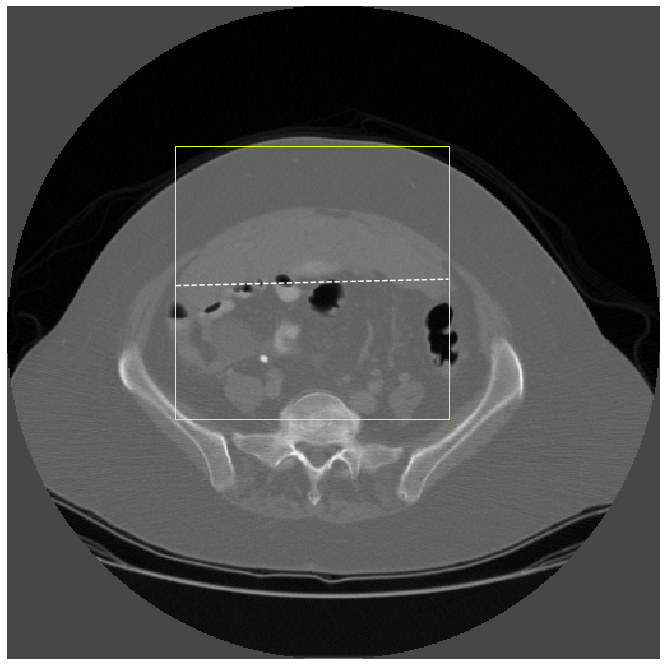

In [10]:
i = 96
subset = "test"

df_subset = df.query("subset == '{}'".format(subset))
img = imread("~/Data/bmi260/{}/{}{}.png".format(subset, prefix, str(i).zfill(6)))
print(img.shape)
lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/{}/{}{}.txt".format(subset, prefix, str(i).zfill(6))).read().split()
sx, sy, ex, ey = df_subset.iloc[i][["start_x", "start_y", "end_x", "end_y"]]
lw = 512 * float(lw)
lh = 512 * float(lh)
lx = 512 * float(lx) - 0.5*lw
ly = 512 * float(ly) - 0.5*lh
print(lx, ly, lw, lh)

fig = plt.figure()
fig.set_size_inches(12, 12)
plt.imshow(img, cmap=cm.gray)
plt.axis("off")
plt.plot([sx, ex], [sy, ey], "w--")
ax = plt.gca()
rect = Rectangle((lx, ly), lw, lh, fill=None, ec="yellow")
ax.add_patch(rect)

In [26]:
data = list()
for i in range(len(df.query("subset == 'train'"))):
    try:
        lc, lx, ly, lw, lh = open("/Users/liponan/Data/bmi260/train/{}.txt".format(str(i).zfill(6))).read().split()
    except FileNotFoundError:
        break
    data.append(dict(x=float(lx), y=float(ly), w=float(lw), h=float(lh)))
df_txt = pd.DataFrame(data)
df_txt

,x,y,w,h
0,0.3193,0.5927,0.0740,0.0398
1,0.5200,0.5428,0.1499,0.1938
2,0.2823,0.5534,0.0588,0.0441
3,0.7287,0.5794,0.0641,0.0641
4,0.2983,0.5429,0.1403,0.1403
...,...,...,...,...
2097,0.3989,0.5225,0.0099,0.0144
2098,0.6414,0.6392,0.0869,0.1548
2099,0.6770,0.3058,0.0180,0.0181
2100,0.7028,0.6755,0.0983,0.0983


## Categorized test sets

### By anatomy

In [11]:
gray = False

# subsets = ["val", "test", "train"]
subsets = ["test"]
keyword = "anatomy"
subsubsets = ["Renal", "Ovarian", "Lung", "Liver"]
export_path = "/Users/liponan/Data/bmi260/"

make_img = True
make_label = True

if gray:
    prefix = "gray"
else:
    prefix = ""

for subset in subsets:
    print("generating {} subset".format(subset))
    for subsubset in subsubsets:
        df_subset = df.query("subset == '{}' and {} == '{}'".format(subset, keyword, subsubset))
        df_subset.to_csv(os.path.join(export_path, "rsna2017_{}_{}.csv".format(subset, subsubset)))
        os.makedirs(os.path.join(export_path, "{}_{}".format(subset, subsubset)), exist_ok=True)
        for i in range(len(df_subset)):
            # image
            img = dcm.read_file(df_subset["filename"].iloc[i]).pixel_array
            hh, ww = img.shape
            if make_img:
                img = img.astype(np.float)
                img = img - np.min(img[76:(76+360), 76:(76+360)])
                img = img / np.max(img[76:(76+360), 76:(76+360)])
                img = (255*img).astype(np.uint8)
                if gray:
                    pass
                else:
                    img = gray2rgb(img)
                imsave(os.path.join(export_path, "{}_{}".format(subset, subsubset),
                                    "{}{}.png".format(prefix, str(i).zfill(6))), img)
            # label
            if make_label:
                xs, xe, ys, ye = df_subset.iloc[i][["start_x", "end_x", "start_y", "end_y"]]
                x = 1/ww * 0.5 * (xs + xe)
                y = 1/hh * 0.5 * (ys + ye)
                w = 1/ww * max(2, np.abs(xs - xe))
                h = 1/hh * max(2, np.abs(ys - ye))
                if w / h > 2.5:
                    h = w
                elif h / w > 2.5:
                    w = h
                else:
                    pass
                with open(os.path.join(export_path, "{}_{}".format(subset, subsubset),
                                       "{}{}.txt".format(prefix, str(i).zfill(6))), "w") as f:
                    f.write("{} {:.4f} {:.4f} {:.4f} {:.4f}".format(0, x, y, w, h))


generating test subset


### By radiologist status

In [14]:
gray = False

# subsets = ["val", "test", "train"]
subsets = ["test"]
keyword = "radiologist_status"
subsubsets = ["radiologist", "not_radiologist"]
export_path = "/Users/liponan/Data/bmi260/"

make_img = True
make_label = True

if gray:
    prefix = "gray"
else:
    prefix = ""

for subset in subsets:
    print("generating {} subset".format(subset))
    for subsubset in subsubsets:
        df_subset = df.query("subset == '{}' and {} == '{}'".format(subset, keyword, subsubset))
        df_subset.to_csv(os.path.join(export_path, "rsna2017_{}_{}.csv".format(subset, subsubset)))
        os.makedirs(os.path.join(export_path, "{}_{}".format(subset, subsubset)), exist_ok=True)
        for i in range(len(df_subset)):
            # image
            img = dcm.read_file(df_subset["filename"].iloc[i]).pixel_array
            hh, ww = img.shape
            if make_img:
                img = img.astype(np.float)
                img = img - np.min(img[76:(76+360), 76:(76+360)])
                img = img / np.max(img[76:(76+360), 76:(76+360)])
                img = (255*img).astype(np.uint8)
                if gray:
                    pass
                else:
                    img = gray2rgb(img)
                imsave(os.path.join(export_path, "{}_{}".format(subset, subsubset),
                                    "{}{}.png".format(prefix, str(i).zfill(6))), img)
            # label
            if make_label:
                xs, xe, ys, ye = df_subset.iloc[i][["start_x", "end_x", "start_y", "end_y"]]
                x = 1/ww * 0.5 * (xs + xe)
                y = 1/hh * 0.5 * (ys + ye)
                w = 1/ww * max(2, np.abs(xs - xe))
                h = 1/hh * max(2, np.abs(ys - ye))
                if w / h > 2.5:
                    h = w
                elif h / w > 2.5:
                    w = h
                else:
                    pass
                with open(os.path.join(export_path, "{}_{}".format(subset, subsubset),
                                       "{}{}.txt".format(prefix, str(i).zfill(6))), "w") as f:
                    f.write("{} {:.4f} {:.4f} {:.4f} {:.4f}".format(0, x, y, w, h))


generating test subset
